# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [35]:
# Dependencies and Setup
#!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url
#url = "http://api.openweathermap.org/data/2.5/weather?"
temp_units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

In [4]:
response = requests.get(query_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "cod": "400",
    "message": "Nothing to geocode"
}


In [5]:
#set lists
city_weather = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities
count_one = 0
set_one = 1

# loops for dataframe 
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 50:
            count_one = 1
            set_one += 1
            city_weather.append(city)
        else:
            count_one += 1
            city_weather.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

City not found. Skipping...
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | gillette
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | inirida
Processing Record 6 of Set 1 | east london
City not found. Skipping...
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | batavia
Processing Record 10 of Set 1 | lapua
Processing Record 11 of Set 1 | victoria
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | valparaiso
City not found. Skipping...
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | vilnius
Processing Record 17 of Set 1 | sirur
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | lakes entrance
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | buraydah
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of 

City not found. Skipping...
Processing Record 30 of Set 4 | iranshahr
Processing Record 31 of Set 4 | kousseri
Processing Record 32 of Set 4 | shubarshi
Processing Record 33 of Set 4 | chapais
Processing Record 34 of Set 4 | tibati
Processing Record 35 of Set 4 | morondava
Processing Record 36 of Set 4 | beloha
Processing Record 37 of Set 4 | lagoa
Processing Record 38 of Set 4 | vallenar
Processing Record 39 of Set 4 | sao joao da barra
Processing Record 40 of Set 4 | ishigaki
Processing Record 41 of Set 4 | edremit
Processing Record 42 of Set 4 | constitucion
City not found. Skipping...
Processing Record 43 of Set 4 | alcoa
Processing Record 44 of Set 4 | flinders
Processing Record 45 of Set 4 | palu
Processing Record 46 of Set 4 | nizhniy tsasuchey
Processing Record 47 of Set 4 | karangampel
Processing Record 48 of Set 4 | bambous virieux
City not found. Skipping...
City not found. Skipping...
Processing Record 49 of Set 4 | derbent
Processing Record 50 of Set 4 | katobu
Processing 

Processing Record 10 of Set 8 | porto walter
Processing Record 11 of Set 8 | kahuta
Processing Record 12 of Set 8 | moose jaw
Processing Record 13 of Set 8 | nago
Processing Record 14 of Set 8 | sirohi
Processing Record 15 of Set 8 | tuatapere
Processing Record 16 of Set 8 | bathsheba
Processing Record 17 of Set 8 | ugoofaaru
Processing Record 18 of Set 8 | fonte boa
City not found. Skipping...
Processing Record 19 of Set 8 | praia
City not found. Skipping...
Processing Record 20 of Set 8 | ambon
Processing Record 21 of Set 8 | arrecife
Processing Record 22 of Set 8 | chokurdakh
City not found. Skipping...
Processing Record 23 of Set 8 | severo-yeniseyskiy
Processing Record 24 of Set 8 | kahului
Processing Record 25 of Set 8 | larap
Processing Record 26 of Set 8 | liverpool
Processing Record 27 of Set 8 | camacha
Processing Record 28 of Set 8 | lompoc
Processing Record 29 of Set 8 | mount gambier
Processing Record 30 of Set 8 | bealanana
Processing Record 31 of Set 8 | molepolole
Proce

Processing Record 42 of Set 11 | padang
City not found. Skipping...
City not found. Skipping...
Processing Record 43 of Set 11 | moron
Processing Record 44 of Set 11 | longonjo
Processing Record 45 of Set 11 | san felipe
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
weather_dictionary = {
    "City": city_weather,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Humidity":humidities,
    "Cloudiness":cloudinesses,
    "Wind Speed":wind_speeds,
    "Country":countries,
    "Date":dates,
}

weather_df = pd.DataFrame(weather_dictionary)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.60,-73.97,66.00,75,100,0.56,US,1603219095
1,kapaa,22.08,-159.32,77.00,88,75,10.29,US,1603218976
2,gillette,44.29,-105.50,41.00,80,90,16.11,US,1603218921
3,castro,-24.79,-50.01,79.97,48,16,1.70,BR,1603219096
4,inirida,3.87,-67.92,91.69,53,100,2.04,CO,1603219096


In [9]:
weather_df.to_csv(output_data_file)

In [22]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,23.780018,21.340757,61.390631,71.893694,53.810811,7.768937,1.603219e+09
std,31.409894,86.955909,20.684828,22.000358,40.625461,5.290851,1.838840e+02
min,-54.800000,-179.170000,2.030000,5.000000,0.000000,0.560000,1.603218e+09
25%,-1.235000,-51.675000,46.200000,61.500000,5.000000,3.500000,1.603219e+09
50%,28.480000,23.230000,66.200000,77.000000,65.000000,6.710000,1.603219e+09
75%,48.535000,95.075000,78.400000,87.000000,97.500000,10.290000,1.603219e+09
max,78.220000,178.420000,97.740000,100.000000,100.000000,28.860000,1.603219e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
#print out any cities with humidity over 100, store in new DF. use loc funtion to look. we might not find anything with 
#humidity over 100, but if you do, exclude from data set
print(weather_df[weather_df['Humidity']> 100])

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


In [17]:
#  Get the indices of cities that have humidity over 100%.
#none exist 

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#no cities exist with humidity over 100. skipping this step as the df is already clean

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

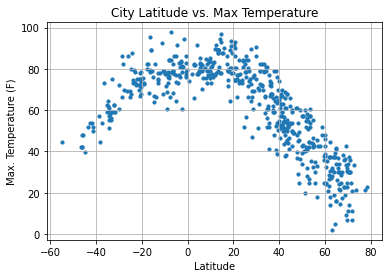

In [17]:
#scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=10)

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save
plt.savefig("output_plots/latitude_temperature_plot.png")

#show
plt.show()

## Latitude vs. Humidity Plot

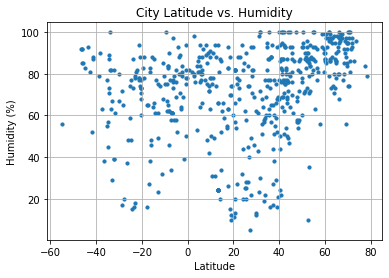

In [18]:
#scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=10)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save
plt.savefig("output_plots/latitude_humidity_plot.png")

#show
plt.show()

## Latitude vs. Cloudiness Plot

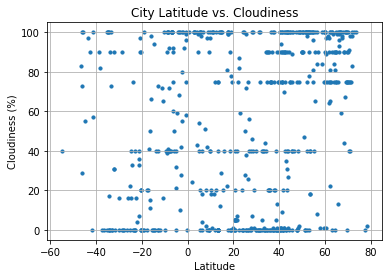

In [19]:
#scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=10)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save
plt.savefig("output_plots/latitude_cloudiness_plot.png")

#show
plt.show()

## Latitude vs. Wind Speed Plot

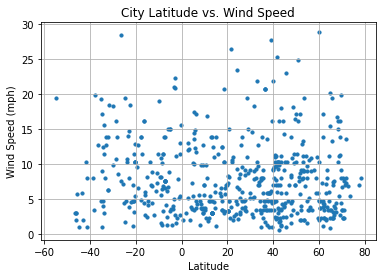

In [20]:
#scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=10)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save
plt.savefig("output_plots/latitude_windspeed_plot.png")

#show
plt.show()

## Linear Regression

In [33]:
northern_hemisphere = weather_df[weather_df['Lat'] >= 0]
southern_hemisphere = weather_df[weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

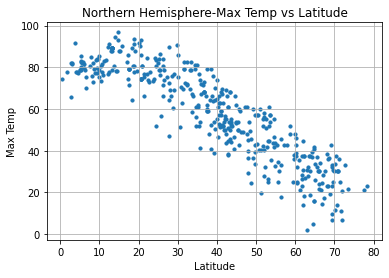

In [38]:
#scatter plot & linear regression
# latitude = northern_hemisphere["Lat"]
# max_temp = northern_hemisphere["Max Temp"]

# (slope, intercept, rvalue, pvalue, stderr) = linregress (latitude, max_temp)
# regress_values = latitude * slope + intercept
# correlation = round(st.pearsonr(latitude, max_temp)[0],2)

plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"], marker="o", s=10)
plt.title("Northern Hemisphere-Max Temp vs Latitude")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)

#save
#plt.savefig("output_plots/latitude_windspeed_plot.png")

#show
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


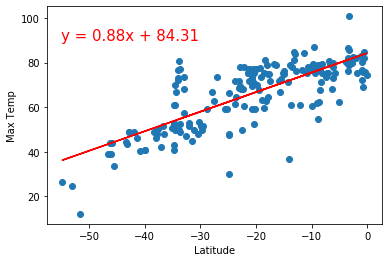

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


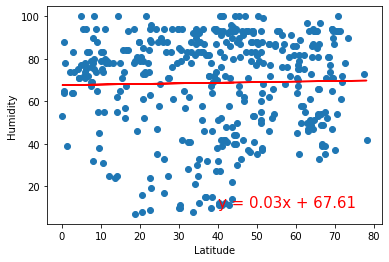

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


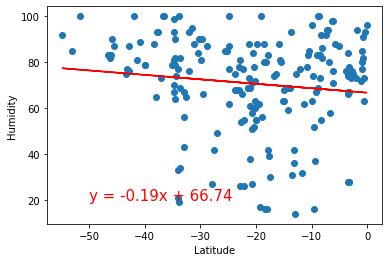

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


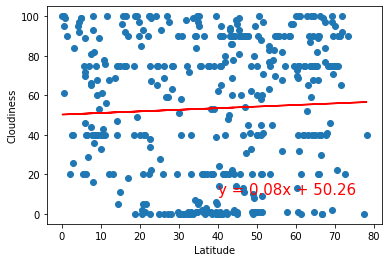

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


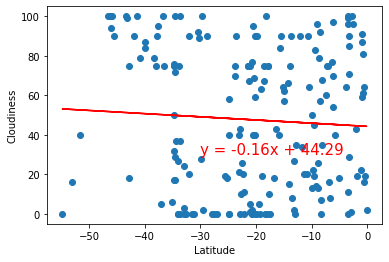

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


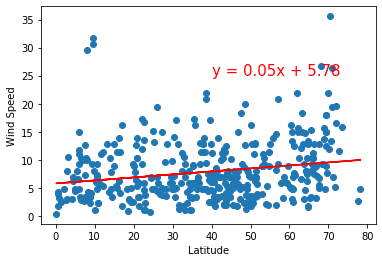

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


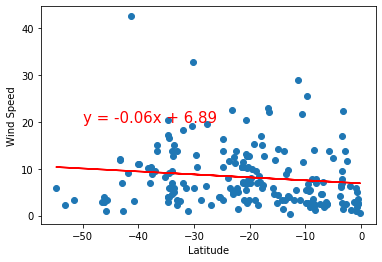